# XGBoost Regressor

---

**Источники:**

[XGBoost](https://neerc.ifmo.ru/wiki/index.php?title=XGBoost)

[Виды ансамблей](https://neerc.ifmo.ru/wiki/index.php?title=%D0%92%D0%B8%D0%B4%D1%8B_%D0%B0%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B5%D0%B9)

[XGBoost Parameters](https://xgboost.readthedocs.io/en/latest/parameter.html)

[Эвристический алгоритм](https://ru.wikipedia.org/wiki/%D0%AD%D0%B2%D1%80%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC#:~:text=%D0%AD%D0%B2%D1%80%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9%20%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%20(%D1%8D%D0%B2%D1%80%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0)%20%E2%80%94%20%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC,%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%BD%D0%B5%20%D0%BC%D0%BE%D0%B6%D0%B5%D1%82%20%D0%B1%D1%8B%D1%82%D1%8C%20%D0%BD%D0%B0%D0%B9%D0%B4%D0%B5%D0%BD%D0%BE.)

[Настройка параметров XGBoost](https://russianblogs.com/article/2308221344)

[Python API Reference](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

[Chapter 12 Gradient Boosting](https://bradleyboehmke.github.io/HOML/gbm.html)

[One-Hot Encoding is making your Tree-Based Ensembles worse, here’s why?](https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769#%3A~%3Atext%3DOne-hot%20encoding%20categorical%20variables%2Cimportance%20resulting%20in%20poorer%20performance)

[Why is XGBoost better than Random Forest?](https://www.quora.com/Why-is-XGBoost-better-than-Random-Forest)

[CatBoost vs. Light GBM vs. XGBoost](https://towardsdatascience.com/catboost-vs-light-gbm-vs-xgboost-5f93620723db)

---


## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [3]:
# !conda install -c conda-forge shap -y

In [4]:
import numpy as np

np.__version__

'1.20.2'

In [5]:
import pandas as pd

pd.__version__

'1.2.4'

In [6]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [7]:
import seaborn as sns

sns.__version__

'0.11.1'

In [8]:
import shap

shap.__version__

'0.39.0'

In [9]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## Загрузка данных

[Источник (Calculate Concrete Strength)](https://www.kaggle.com/prathamtripathi/regression-with-neural-networking)

In [10]:
df = pd.read_csv("./../../data/concrete_data.csv")
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


## Разделение данных на `X` и `y`

In [11]:
target = 'Strength'

In [12]:
from sklearn.model_selection import train_test_split

y = df[target].copy()
X = df.drop(columns=[target]).copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
feature_names_arr = X_train.columns
feature_names_arr

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

In [14]:
feature_names = feature_names_arr.to_list()
feature_names

['Cement',
 'Blast Furnace Slag',
 'Fly Ash',
 'Water',
 'Superplasticizer',
 'Coarse Aggregate',
 'Fine Aggregate',
 'Age']

## Описание

**XGBoost** (e**X**treme **G**radient **Boost**ing) является оптимизированной версией алгоритма Gradient Boosting.

**Одна из самых популярных и эффективных реализаций алгоритма градиентного бустинга на деревьях на 2019-й год.**


В основе XGBoost лежит алгоритм градиентного бустинга деревьев решений. 

**Градиентный бустинг** — это техника машинного обучения для задач **классификации** и **регрессии**, которая строит модель предсказания в форме ансамбля слабых предсказывающих моделей, обычно **деревьев решений**. Обучение ансамбля проводится последовательно в отличие, например от бэггинга. 

**Ансамбль алгоритмов (методов)** — метод, который использует несколько обучающих алгоритмов с целью получения лучшей эффективности прогнозирования, чем можно было бы получить от каждого обучающего алгоритма по отдельности.

На каждой итерации вычисляются отклонения предсказаний уже обученного ансамбля на обучающей выборке. Следующая модель, которая будет добавлена в ансамбль будет предсказывать эти отклонения. Таким образом, добавив предсказания нового дерева к предсказаниям обученного ансамбля мы можем уменьшить среднее отклонение модели, котрое является таргетом оптимизационной задачи. Новые деревья добавляются в ансамбль до тех пор, пока ошибка уменьшается, либо пока не выполняется одно из правил "ранней остановки".

Реализация алгоритма была разработана для эффективности вычислительных ресурсов времени и памяти. Цель проекта заключалась в том, чтобы наилучшим образом использовать имеющиеся ресурсы для обучения модели. Некоторые ключевые функции реализации алгоритма включают:
- Различные стратегии обработки пропущенных данных.
- Блочная структура для поддержки распараллеливания обучения деревьев.
- Продолжение обучения для дообучения на новых данных.

### Особенности модели

XGBoost поддерживает все возможности таких библиотек как scikit-learn с возможностью добавлять регуляризацию. Поддержаны **три главные формы градиетного бустинга**:
- Стандартный градиентный бустинг с возможностью изменения скорости обучения (learning rate).
- Стохастический градиентный бустинг с возможностью семплирования по строкам и колонкам датасета.
- Регуляризованный градиентный бустинг с L1 и L2 регуляризацией.

### Системные функции

Библиотека предоставляет систему для использования в различных вычислительных средах:

- Параллелизация построения дерева с использованием всех ваших ядер процессора во время обучения.
- Распределенные вычисления для обучения очень крупных моделей с использованием кластера машин.
- Вычисления для очень больших наборов данных, которые не вписываются в память.
- Кэш Оптимизация структуры данных и алгоритма для наилучшего использования аппаратного обеспечения.

### Рекомендации

- Незаметная слабая сторона XGBoost: модель преобразует категориальные переменные в One Hot Encoding (OHE). Как правило One-Hot Encoding ухудшает древовидные ансамбли.

- Если у вас много категориальных переменных, лучшим выбором будет CatBoost или Light GBM.

- Одна приятная особенность деревьев (XGBoost, Random Forest и т.д.) заключается в том, что не нужно нормализовать свои признаки, как это следует делать, например, с SVM.

- Деревья также хорошо справляются, если данные являются "lumpy", то есть немонотонные.

- Еще одна проблема с деревьями, на которые стоит обратить внимание, - они могут переобучиться. Если настроить параметры так, чтобы деревья оказались слишком глубокими, то с зашумленными данными, вероятно, получится переобученная модель.

- Нет никаких конкретных доказательств того, что XGBoost работает намного лучше, чем Random Forest, но на практике это как правило так.

## Feature Selection

Text(0.5, 1.0, 'Feature importances via coefficients')

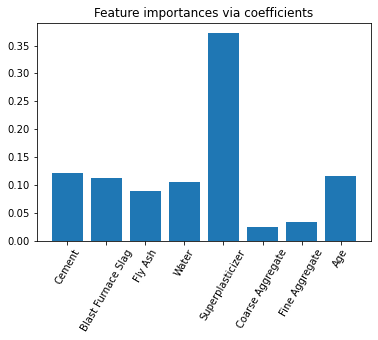

In [15]:
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X_train, y_train)
importance = np.abs(lasso.coef_)

plt.bar(height=importance, x=feature_names)
plt.xticks(rotation=60)
plt.title("Feature importances via coefficients")

In [16]:
from sklearn.feature_selection import SequentialFeatureSelector

sfs_forward = SequentialFeatureSelector(lasso, 
                                        n_features_to_select=5,
                                        direction='forward').fit(X_train, y_train)

In [17]:
sfs_forward.get_support()

array([ True,  True, False,  True,  True, False, False,  True])

In [18]:
feat_selected = feature_names_arr[sfs_forward.get_support()]
feat_selected

Index(['Cement', 'Blast Furnace Slag', 'Water', 'Superplasticizer', 'Age'], dtype='object')

## Обучение модели (Train) - pipeline

### Важные параметры `xgboost.XGBRegressor`

- **`n_estimators (int)`**
    - Количество деревьев с градиентным усилением. Эквивалентно количеству раундов boost-инга (boosting rounds).

- **`max_depth (int) [default=6]`**
    - Максимальная глубина дерева. Увеличение этого значения сделает модель более сложной и с большей вероятностью переобучится (overfit).
    - Допустимые значения: $[0, \infty]$, `0` принимается только в lossguided для роста, когда tree_method установлен как hist и указывает отсутствие ограничения на глубину. Помните, что XGBoost агрессивно расходует память при обучении глубокого дерева.

- **`learning_rate (float) [default=0.3, alias: eta]`**
    - Уменьшение размера шага, используемое в обновлении, чтобы **предотвратить переобучение (overfitting)**. После каждого шага повышения мы можем напрямую получить веса новых функций, а eta уменьшает веса функций, чтобы сделать процесс повышения более консервативным.
    - Допустимые значения: $[0, 1]$

### Важные параметры `fit`

- **`X (array_like)`** - Матрица признаков.
    

- **`y (array_like)`** - Labels ("правильные ответы").


- **`early_stopping_rounds (int)`** 
    - Активирует раннюю остановку.
    - Чтобы продолжить обучение, показатель валидации должен улучшаться хотя бы раз в каждом раунде `early_stopping_rounds`.
    - Требуется хотя бы один элемент в `eval_set`.
    - Метод возвращает модель с последней итерации (а не самой лучшей).
    - Если в `eval_set` более одного элемента, для ранней остановки будет использоваться *последняя запись* (last entry).
    - Если в `eval_metric` более одной метрики, для ранней остановки будет использоваться *последняя метрика* (last metric).
    - Если произойдет ранняя остановка, модель будет иметь три дополнительных поля: `clf.best_score`, `clf.best_iteration` и `clf.best_ntree_limit`.

In [19]:
param_grid = {'model__max_depth': [3, 5, 8], 
              'model__n_estimators': [10, 250, 500, 900], 
              'model__learning_rate': [0.05, 0.35]}

In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ('passthrough', 'passthrough', feat_selected.to_list())
    ]) 

In [21]:
import xgboost as xg

pipeline = Pipeline(steps = [
            ('preprocessor', preprocessor),
            ('model', xg.XGBRegressor())
        ])

In [22]:
model_gs = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
model_gs.fit(X_train, y_train)

In [ ]:
print(f"best_params: {model_gs.best_params_}")
print(f"best_score: {model_gs.best_score_:0.2f}")

In [ ]:
pd.DataFrame(model_gs.cv_results_)

## Оценка качества модели (Evaluation)

In [ ]:
y_test_predicted = model_gs.predict(X_test)
y_train_predicted = model_gs.predict(X_train)

In [ ]:
print(f'R2 (train): {r2_score(y_train, y_train_predicted)}')
print(f'R2 (test): {r2_score(y_test, y_test_predicted)}')

print(f"MSE (train): {mean_squared_error(y_train, y_train_predicted, squared=True)}")
print(f"MSE (test): {mean_squared_error(y_test, y_test_predicted, squared=True)}")

## Важность признаков

### XGBoost [Plotting API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.plotting)

In [ ]:
model_gs.best_estimator_['model'].get_booster().feature_names = feature_names

In [ ]:
xg.plot_importance(model_gs.best_estimator_['model'].get_booster(), height=0.6)

### [SHAP](https://github.com/slundberg/shap)

TODO

In [ ]:
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)

In [ ]:
choosen_instance = X_train.iloc[[1]]
choosen_instance

In [ ]:
shap.summary_plot(shap_values, X_train)

In [ ]:
shap_values = explainer.shap_values(choosen_instance)

In [ ]:
shap.force_plot(explainer.expected_value[0], shap_values[0], choosen_instance)

## *Параметры XGBRegressor для Python Scikit-Learn API

### `class xgboost.XGBRegressor(**kwargs)`

- **`n_estimators (int)`**
    - Количество деревьев с градиентным усилением. Эквивалентно количеству раундов boost-инга (boosting rounds).


- **`max_depth (int) [default=6]`**
    - Максимальная глубина дерева. Увеличение этого значения сделает модель более сложной и с большей вероятностью переобучится (overfit).
    - Допустимые значения: $[0, \infty]$, `0` принимается только в `lossguided` для роста, когда `tree_method` установлен как hist и указывает отсутствие ограничения на глубину. Помните, что XGBoost агрессивно расходует память при обучении глубокого дерева.


- **`learning_rate (float) [default=0.3, alias: eta]`**
    - Уменьшение размера шага, используемое в обновлении, чтобы **предотвратить переобучение (overfitting)**. После каждого шага повышения мы можем напрямую получить веса новых функций, а eta уменьшает веса функций, чтобы сделать процесс повышения более консервативным.
    - Допустимые значения: $[0, 1]$


- **`subsample (float) [default=1]`**
    - Соотношение подвыборки обучающих примеров. Установка его на `0.5` означает, что XGBoost будет случайным образом выбирать половину обучающих данных перед выращиванием деревьев. И это *предотвратит переобучение (overfitting)*.
    - Подвыборка (subsample) будет выполняться один раз на каждой итерации boosting-а.
    - Допустимые значения: $(0, 1]$


- `verbosity  (int) [default=1]`
    - Детальность печатных сообщений.
    - Допустимые значения:
        - 0 (silent)
        - 1 (warning)
        - 2 (info)
        - 3 (debug)
    - Иногда XGBoost пытается изменить конфигурации на основе эвристики, что отображается как предупреждающее сообщение. Если происходит неожиданное поведение, попробуйте увеличить значение подробности.
    - *Эвристический алгоритм (эвристика) — алгоритм решения задачи, включающий практический метод, не являющийся гарантированно точным или оптимальным, но достаточный для решения поставленной задачи. Позволяет ускорить решение задачи в тех случаях, когда точное решение не может быть найдено.


- `objective (string | callable)`
    - Устанавливает задачу обучения (learning task) и соответствующую цель обучения (learning objective) или настраиваемую целевую функцию (objective function), которая будет использоваться.
    - В этом случае objective parameter должен иметь сигнатуру `(y_true, y_pred) -> grad, hess`
        - `y_true: array_like of shape [n_samples]` - Целевые значения
        - `y_pred: array_like of shape [n_samples]` - Прогнозируемые значения
        - `grad: array_like of shape [n_samples]`- Значение градиента для каждой точки выборки.
        - `hess: array_like of shape [n_samples]` - Значение второй производной для каждой точки выборки


- `booster (string) [default='gbtree']`
    - Какой booster использовать.
    - Допустимые значения:
        - `gbtree`
        - `gblinear`
        - `dart`
    - `gbtree` и `dart` используют модели на основе дерева (tree based models), в то время как `gblinear` использует линейные функции (linear functions).


- `tree_method (string) [default='auto']`
    - Алгоритм построения дерева, используемый в XGBoost.
    - XGBoost поддерживает `approx`, `hist` и `gpu_hist` для распределенного обучения. Экспериментальная поддержка внешней памяти доступна для `approx` и `gpu_hist`.
    - Допустимые значения: `auto`, `exact`, `approx`, `hist`, `gpu_hist`, это комбинация часто используемых средств обновления. Для других средств обновления, таких как `refresh`, установите параметр `updater` напрямую.
        - `auto`: Использует эвристику, чтобы выбрать самый быстрый метод.
            - Для большего набора данных будет выбран `approx`. Рекомендуется попробовать `hist` и `gpu_hist` для повышения производительности с большим набором данных. `gpu_hist` поддерживает внешнюю память.
            - Поскольку старое поведение всегда использует точную жадность ([exact greedy](https://medium.com/analytics-vidhya/boosting-models-unwrapping-the-basic-exact-greedy-algorithm-b67d88c7189a)) на одной машине, пользователь получит сообщение, когда будет выбран `approx` алгоритм для уведомления об этом выборе.
        - `exact`: Точный жадный алгоритм ([exact greedy](https://medium.com/analytics-vidhya/boosting-models-unwrapping-the-basic-exact-greedy-algorithm-b67d88c7189a)). Перечисляет всех отдельных кандидатов.
        - `approx`: Приблизительный жадный алгоритм ([approximate greedy](https://towardsdatascience.com/why-xgboost-is-so-effective-3a193951e289)) с использованием квантилей ([quantile sketch](https://datasketches.apache.org/docs/Quantiles/QuantilesOverview.html)) и гистограммы градиента.
        - `hist`: Более быстрый приближенный жадный алгоритм Приблизительный жадный алгоритм ([approximate greedy](https://towardsdatascience.com/why-xgboost-is-so-effective-3a193951e289)), оптимизированный для гистограммы.
        - `gpu_hist`: Реализация алгоритма `hist` на GPU.


- `n_jobs (int)`
    - Количество параллельных потоков, используемых для запуска `xgboost`.
    - При использовании с другими алгоритмами Scikit-Learn, такими как `grid search`, можно выбрать, какой алгоритм распараллеливать и балансировать потоки.
    - Создание конкуренции потоков ([thread contention](https://stackoverflow.com/questions/1970345/what-is-thread-contention#:~:text=Essentially%20thread%20contention%20is%20a,has%20unlocked%20that%20particular%20object.)) значительно замедлит работу обоих алгоритмов.


- `gamma (float) [default=0, alias: min_split_loss]`
    - Минимальное изменение значения функции потерь (Minimum loss reduction), необходимое для дальнейшего разбиения листового узла (leaf node) дерева (tree), то есть разделение листа на поддеревья. Чем больше `gamma`, тем более "консервативным" будет алгоритм.
    - Допустимые значения: $[0, \infty]$


- `min_child_weight (float) [default=1]`
    - Минимальная сумма веса экземпляра (hessian), необходимая для дочернего узла (child). Если на этапе разбиения дерева получается листовой узел (leaf node) с суммой веса экземпляра меньше min_child_weight, то процесс построения откажется от дальнейшего разделения.
    - В задаче линейной регрессии (linear regression) это просто соответствует минимальному количеству экземпляров (instances), которое должно быть в каждом узле. Чем больше min_child_weight, тем более "консервативным": будет алгоритм.
    - Допустимые значения: $[0, \infty]$


- `max_delta_step (int) [default=0]`
    - Максимальный шаг дельты, который допускается на выходе каждого листа (leaf output) для оценки веса каждого дерева.
    - Если значение установлено на `0`, это означает, что ограничения нет.
    - Если для него установлено `положительное значение`, это может помочь сделать шаг обновления более "консервативным".
    - *Обычно этот параметр не нужен*, но он может помочь в логистической регрессии (logistic regression), когда класс крайне несбалансирован (imbalanced).
    - Установка значения 1-10 может помочь контролировать обновление.
    - Допустимые значения: $[0, 1]$


- `colsample_bytree, colsample_bylevel, colsample_bynode (float)[default=1]`
    - Это семейство параметров для подвыборки столбцов.
    - Все параметры `colsample_by*` имеют диапазон `(0, 1]`, значение по умолчанию 1, и определяют долю столбцов, подлежащих подвыборке.
    - `colsample_bytree` - это соотношение столбцов подвыборки при построении каждого дерева. Подвыборка (subsampling) выполняется один раз для каждого построенного дерева.
    - `colsample_bylevel` - отношение подвыборки столбцов для каждого уровня. Подвыборка (subsampling) выполняется один раз для каждого нового уровня глубины, достигнутого в дереве. Столбцы выбираются из набора столбцов, выбранных для *текущего дерева*.
    - `colsample_bynode` - это отношение подвыборки столбцов для каждого узла (разбиение). Подвыборка (subsampling) происходит каждый раз при оценке нового разделения. Столбцы выбираются из набора столбцов, выбранных для *текущего уровня*.
    - `colsample_by*` параметры работают [кумулятивно (накопительно)](https://ru.wiktionary.org/wiki/%D0%BA%D1%83%D0%BC%D1%83%D0%BB%D1%8F%D1%82%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9). Например, комбинация `{'colsample_bytree':0.5, 'colsample_bylevel':0.5, 'colsample_bynode':0.5}` с 64 признаками оставит 8 признаков на выбор в каждом сплите (split).
    - В интерфейсе Python при использовании метода `hist`, `gpu_hist` или `exact` методов дерева (tree method) можно установить `feature_weights` для DMatrix, чтобы определить вероятность выбора каждой функции при использовании выборки столбцов (column sampling). Аналогичный параметр для метода `fit` есть в интерфейсе sklearn.


- `reg_alpha (float) [default=0, alias: alpha]`
    - Элемент регуляризации L1 ([lasso regression](http://www.machinelearning.ru/wiki/index.php?title=%D0%9B%D0%B0%D1%81%D1%81%D0%BE)) на весах.
    - Увеличение этого значения сделает модель более "консервативной".

- `reg_lambda (float) [default=1, alias: lambda]`
    - Условие L2 регуляризации ([ridge regression или Tikhonov regularization](http://www.machinelearning.ru/wiki/index.php?title=%D0%A0%D0%B8%D0%B4%D0%B6-%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F)) весов.
    - Увеличение этого значения сделает модель более "консервативной".


- `scale_pos_weight (float) [default=1]`
    - Контролирует баланс положительных и отрицательных весов, что полезно для несбалансированных классов.
    - Типичное значение, которое следует учитывать: `sum(negative instances) / sum(positive instances)`.


- `base_score (float) [default=0.5]`
    - Начальная оценка прогноза для всех экземпляров, глобальный bias.
    - При достаточном количестве итераций изменение этого значения не будет иметь большого эффекта.


- `random_state (int)`
    - Начальное число (порождающий элемент) для генератора случайных чисел ([random seed](https://en.wikipedia.org/wiki/Random_seed)).
    - xgboost использует генератор случайных чисел (random generator) только для подвыборки (subsampling). В остальном поведение детерминировано.


- `missing (float) [default=np.nan]`
    - Значение, которое должны быть использовано в качестве пропущенных значений (missing value).


- `num_parallel_tree (int) [default=1] `
    - Количество параллельных деревьев (trees), построенных на каждой итерации.
    - Эта опция используется для поддержки boosting-а случайного леса (random forest).


- `monotone_constraints (str)`
    - Ограничение переменной монотонности.


- `interaction_constraints (str)`
    - Ограничение для взаимодействия, представляющие разрешенные взаимодействия.
    - Ограничения должны быть указаны в виде списка вложений, например `[[0, 1], [2, 3, 4]]`, где каждый внутренний список представляет собой группу индексов функций, которым разрешено взаимодействовать друг с другом.


- `importance_type (string) [default="gain"]`
    - Тип важности признака для свойства `feature_importances_`:.
    - Допустимые значения: `"gain"`, `"weight"`, `"cover"`, `"total_gain"` или `"total_cover"`.


- `**kwargs (dict, optional)`
    - `**kwargs` для объекта XGBoost Booster. Полную документацию по параметрам можно найти [здесь](https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst).
    - `**kwargs` не поддерживается scikit-learn. Нет  гарантии, что параметры, переданные через этот аргумент, будут правильно взаимодействовать с scikit-learn.

### `fit(X, y, *, sample_weight=None, base_margin=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None, sample_weight_eval_set=None, feature_weights=None, callbacks=None)`

Многократный вызов `fit()` приведет к повторному обучению модели с нуля (re-fit from scratch).

Чтобы возобновить обучение с предыдущей контрольной точки, явно передайте аргумент xgb_model_gs.


- **`X (array_like)`** - Матрица признаков.


- **`y (array_like)`** - Labels ("правильные ответы").


- **`early_stopping_rounds (int)`**
    - Активирует раннюю остановку.
    - Чтобы продолжить обучение, показатель валидации должен улучшаться хотя бы раз в каждом раунде `early_stopping_rounds`.
    - Требуется хотя бы один элемент в `eval_set`.
    - Метод возвращает модель с последней итерации (а не самой лучшей).
    - Если в `eval_set` более одного элемента, для ранней остановки будет использоваться *последняя запись* (last entry).
    - Если в `eval_metric` более одной метрики, для ранней остановки будет использоваться *последняя метрика* (last metric).
    - Если произойдет ранняя остановка, модель будет иметь три дополнительных поля: `clf.best_score`, `clf.best_iteration` и `clf.best_ntree_limit`.


- `sample_weight (array_like)` - Веса экземпляров.


- `base_margin (array_like)` - Глобальный байес (bias) для каждого экземпляра.


- `eval_set (list, optional)` - Список пар кортежей (X, y) для использования в качестве проверочных наборов (validation sets), для которых будут вычисляться метрики. Показатели валидации (Validation metrics) помогают отслеживать производительность (performance) модели.


- `eval_metric (str, list of str, or callable, optional)`
    - Если `str`, должна быть встроенная (built-in) метрика оценки для использования.
    - Если список `list of str`, должен быть список нескольких встроенных метрик оценки для использования.
    - Если вызываемая (`callable`), то пользовательская метрика оценки. Сигнатура вызова - `func(y_predicted, y_true)`, где `y_true` будет объектом `DMatrix`, может потребоваться вызвать метод `get_label`. Он должен возвращать пару `str, value`, где `str` - это имя для оценки, а `value` - это значение функции оценки. Вызываемая пользовательская задача (objective) всегда сводится к минимуму.

### `predict(data, output_margin=False, ntree_limit=None, validate_features=True, base_margin=None)`

**Эта функция не является потокобезопасной.**

Для каждого объекта booster-а `predict` можно вызвать только из одного потока.

Если необходимо выполнить `predict` с использованием нескольких потоков, используйте `xgb.copy()`, чтобы сделать копии объекта модели, а затем вызовите `predict()`.

- **`data (numpy.array/scipy.sparse)`**
    - Данные для прогнозирования.


- **`validate_features (bool)`**
    - Если это `True`, то будет произведена проверка (validate), что `feature_names` для `Booster` и `data` идентичны. В противном случае предполагается, что `feature_names` совпадают.


- `output_margin (bool)`
    - Выводить ли необработанное непреобразованное значение границы (margin).


- `ntree_limit (int)`
    - Ограничить количество деревьев в прогнозе
    - Значение по умолчанию: `best_ntree_limit`, если он определен (т.е. он был обучен с ранней остановкой (early stopping)), в противном случае - `0` (использовать все деревья).